In [2]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']


data = pd.read_csv('E:/databag/bag2/SpectralClustering聚类(2到7)结果(log非线性变化).csv',index_col=0)

data1=data.drop('4个簇',axis=1)
data1
data2=data1.drop('5个簇',axis=1)
data3=data2.drop('6个簇',axis=1)
data4=data3.drop('7个簇',axis=1)
data5=data4.drop('3个簇',axis=1)
data6=data5.drop('2个簇',axis=1)
data6



,性别,肺活量,身高(cm),体重(kg),谷丙转氨酶(ALT)(U/L),总胆红素(TBIL)(umol/L),平均血小板体积(MPV)(fl),白细胞计数(WBC)(10^9/L),中性粒细胞绝对值(NE#)(10^9/L),中性粒细胞比值(NE%)(%),...,平均红细胞血红蛋白浓度(MCHC)(g/L),红细胞分布宽度变异系数(RDW_CV)(%),血小板计数(PLT)(10^9/L),血小板分布宽度(PDW)(%),大血小板比率(P-LCR)(%),中间细胞百分比(MID%)(%),中间细胞绝对值(MID#)(10^9/L),红细胞分布宽度(RDW-SD)(%),血压-高(mmHg),血压-低(mmHg)
0,1.000000,1.179629,1.266581,1.102205,1.024219,1.024390,1.014608,1.056992,1.052856,1.159951,...,1.271335,1.075878,1.078832,1.081325,1.026294,1.082628,1.037993,1.087983,1.206491,1.110194
1,1.000000,1.135789,1.278838,1.095404,1.026011,1.003907,1.205456,1.076937,1.058560,1.135758,...,1.234261,1.063625,1.083348,1.056351,1.110669,1.166571,1.092406,1.155441,1.206491,1.153189
2,1.000000,1.179629,1.266581,1.120120,1.007583,1.003307,1.168848,1.056992,1.044238,1.130737,...,1.225334,1.053713,1.085598,1.115671,1.123068,1.146624,1.074596,1.217579,1.232023,1.147915
3,1.000000,1.120739,1.277314,1.111203,1.018103,1.005854,1.252272,1.044322,1.032631,1.120053,...,1.123975,1.043702,1.087843,1.017679,1.305591,1.127852,1.056462,1.145267,1.193477,1.147915
4,1.000000,1.172454,1.278838,1.115671,1.021192,1.022037,1.130848,1.079402,1.086602,1.222542,...,1.158116,1.038659,1.083911,1.182873,1.168242,1.143675,1.092406,1.229138,1.212017,1.087983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,1.313262,1.128292,1.278838,1.135535,1.006697,1.012582,1.168848,1.148375,1.173929,1.290162,...,1.254060,1.092785,1.078832,1.146953,1.169280,1.072665,1.056462,1.188626,1.239200,1.219339
4047,1.000000,1.074178,1.265038,1.137718,1.004609,1.004866,1.104688,1.007966,1.023837,1.171831,...,1.254060,1.137282,1.087843,1.125552,1.111402,1.116736,1.019177,1.163284,1.184076,1.243659
4048,1.000000,1.150617,1.266581,1.133348,1.015005,1.004941,1.064118,1.177814,1.153448,1.200408,...,1.204953,1.235387,1.159759,1.125552,1.074996,1.163528,1.176991,1.247770,1.206491,1.189351
4049,1.000000,1.066202,1.260395,1.095404,1.008780,1.013087,1.098039,1.084315,1.083833,1.196697,...,1.245309,1.146403,1.082785,1.119635,1.098485,1.121674,1.074596,1.261013,1.149481,1.087983


In [3]:
#存放设置不同簇数时的SSE值
sse_list =[]
# 轮廓系数
silhouettes = []
#Calinski-Harabaz Index
scores = []
#Davies-Bouldin Index
davies_list = []
# 循环设置不同的聚类簇数
for i in range(4, 10):
    y_pre = np.array(data.iloc[:,23+i])
    # 轮廓系数
    silhouette = metrics.silhouette_score(data4, y_pre, metric='euclidean')
    silhouettes.append(silhouette)
    #Davies-Bouldin Index
    davies_list.append(davies_bouldin_score(data4,y_pre))
    #Calinski-Harabaz Index
    score = calinski_harabasz_score(data4,y_pre)
    scores.append(score)

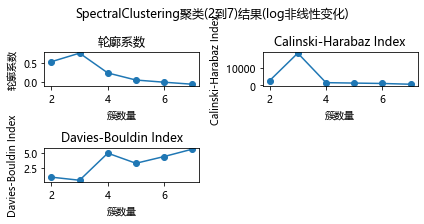

In [4]:

# 绘制轮廓系数曲线
plt.subplot(321)
plt.title('轮廓系数')
plt.plot(range(2, 8), silhouettes, marker='o')
plt.xlabel('簇数量')
plt.ylabel('轮廓系数')
# 绘制Calinski-Harabaz Index曲线
plt.subplot(322)
plt.title('Calinski-Harabaz Index')
plt.plot(range(2, 8),scores , marker='o')
plt.xlabel('簇数量')
plt.ylabel('Calinski-Harabaz Index')

# 绘制Davies-Bouldin Index曲线
plt.subplot(323)
plt.title('Davies-Bouldin Index')
plt.plot(range(2, 8),davies_list, marker='o')
plt.xlabel('簇数量')
plt.ylabel('Davies-Bouldin Index')

plt.suptitle('SpectralClustering聚类(2到7)结果(log非线性变化)')
plt.tight_layout()
plt.show()

In [5]:
silhouettes[1]

0.7462555060796378

In [1]:
data

NameError: name 'data' is not defined